In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/saikarthik/Desktop/xai /nasdq.csv', index_col=0, parse_dates=True)



In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])



In [4]:
def create_sequences(data, seq_length=60):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])  # Sequence of past 60 days
        y.append(data[i, 0])  # Next day's price
    return np.array(x), np.array(y)

x, y = create_sequences(scaled_data)


In [5]:
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  

model.compile(optimizer='adam', loss='mean_squared_error')


2024-11-13 09:53:29.249030: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-13 09:53:29.249061: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-13 09:53:29.249065: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-13 09:53:29.249106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-13 09:53:29.249120: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Step 7: Make predictions
predicted_prices = model.predict(x_test)

# Step 8: Inverse transform the predictions and the true values to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/10


2024-11-13 09:53:30.480817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-13 09:53:30.706858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-13 09:53:30.775567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-13 09:53:30.919066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-13 09:53:31.051482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - 3s 20ms/step - loss: 0.0028
Epoch 2/10
97/97 [==============================] - 2s 19ms/step - loss: 1.3336e-04
Epoch 3/10
97/97 [==============================] - 2s 19ms/step - loss: 1.2856e-04
Epoch 4/10
97/97 [==============================] - 2s 18ms/step - loss: 1.2994e-04
Epoch 5/10
97/97 [==============================] - 2s 18ms/step - loss: 1.2511e-04
Epoch 6/10
97/97 [==============================] - 2s 19ms/step - loss: 1.4480e-04
Epoch 7/10
97/97 [==============================] - 2s 19ms/step - loss: 1.2828e-04
Epoch 8/10
97/97 [==============================] - 2s 18ms/step - loss: 1.1339e-04
Epoch 9/10
97/97 [==============================] - 2s 18ms/step - loss: 1.3490e-04
Epoch 10/10
 1/25 [>.............................] - ETA: 8s

2024-11-13 09:53:49.425405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-13 09:53:49.493898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-13 09:53:49.541177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 18ms/step


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test_rescaled, predicted_prices)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test_rescaled, predicted_prices)
print(f"R-Squared (R²): {r2}")

mse = mean_squared_error(y_test_rescaled, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 1.800891324223166
R-Squared (R²): 0.8812944545215671
Mean Squared Error (MSE): 5.257871077209621


Root Mean Squared Error: 2.2930048140397834


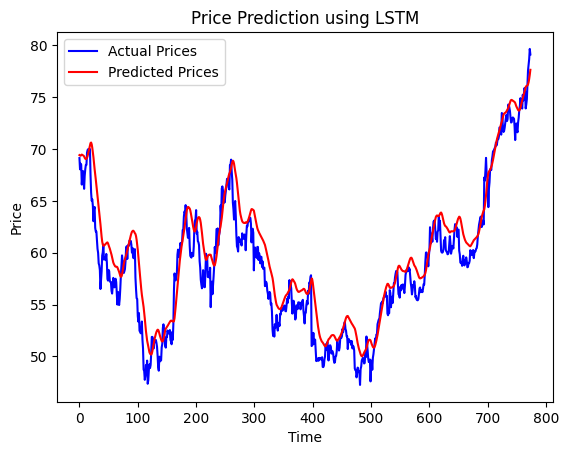

In [9]:
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predicted_prices))
print(f"Root Mean Squared Error: {rmse}")

# Step 10: Plot the predictions vs. actual values
plt.plot(y_test_rescaled, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
model.save('lstm_model.h5')  


/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
last_sequence = scaled_data[-60:]  
last_sequence = last_sequence.reshape(1, 60, 1) 

next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(next_day_prediction)  

print(f"Next day's predicted price: {next_day_prediction[0][0]}")


1/1 [==============================] - 0s 44ms/step
Next day's predicted price: 78.11033630371094


In [12]:
# Predicting the next week's prices (5 days)
predictions_week = []
current_sequence = scaled_data[-60:]  

for _ in range(5): 
    current_sequence = current_sequence.reshape(1, 60, 1)
    next_day_pred = model.predict(current_sequence)
    next_day_pred_rescaled = scaler.inverse_transform(next_day_pred)
    predictions_week.append(next_day_pred_rescaled[0][0])
    current_sequence = np.append(current_sequence[0][1:], next_day_pred)  # Shift the sequence for next prediction

print("Predicted prices for next week:", predictions_week)


1/1 [==============================] - 0s 14ms/step
Predicted prices for next week: [78.11034, 78.47956, 78.79154, 79.06184, 79.30282]


In [13]:
print(np.mean(predictions_week))

78.74922


In [14]:
# Predicting the next month's prices (20 days)
predictions_month = []
current_sequence = scaled_data[-60:]  

for _ in range(20):  
    current_sequence = current_sequence.reshape(1, 60, 1)
    next_day_pred = model.predict(current_sequence)
    next_day_pred_rescaled = scaler.inverse_transform(next_day_pred)
    predictions_month.append(next_day_pred_rescaled[0][0])
    current_sequence = np.append(current_sequence[0][1:], next_day_pred)  # Shift the sequence for next prediction

print("Predicted prices for next month:", predictions_month)


1/1 [==============================] - 0s 13ms/step
Predicted prices for next month: [78.11034, 78.47956, 78.79154, 79.06184, 79.30282, 79.5238, 79.731476, 79.93042, 80.12362, 80.313, 80.4997, 80.68437, 80.86734, 81.04879, 81.22878, 81.407295, 81.58434, 81.75989, 81.93391, 82.10636]


In [15]:
np.mean((predictions_month))

80.32446

In [16]:
predictions_year = []
current_sequence = scaled_data[-60:]  

for _ in range(252): 
    current_sequence = current_sequence.reshape(1, 60, 1)
    next_day_pred = model.predict(current_sequence)
    next_day_pred_rescaled = scaler.inverse_transform(next_day_pred)
    predictions_year.append(next_day_pred_rescaled[0][0])
    current_sequence = np.append(current_sequence[0][1:], next_day_pred)  

print("Predicted prices for next year:", predictions_year)


1/1 [==============================] - 0s 14ms/step
Predicted prices for next year: [78.11034, 78.47956, 78.79154, 79.06184, 79.30282, 79.5238, 79.731476, 79.93042, 80.12362, 80.313, 80.4997, 80.68437, 80.86734, 81.04879, 81.22878, 81.407295, 81.58434, 81.75989, 81.93391, 82.10636, 82.27725, 82.446556, 82.61425, 82.78036, 82.944824, 83.10769, 83.26893, 83.42855, 83.58653, 83.742874, 83.89759, 84.05067, 84.20211, 84.35193, 84.50012, 84.64665, 84.791595, 84.93488, 85.07657, 85.216606, 85.35506, 85.49189, 85.62711, 85.76075, 85.892784, 86.023254, 86.152145, 86.27945, 86.405205, 86.5294, 86.652054, 86.773186, 86.892784, 87.010864, 87.12743, 87.2425, 87.35608, 87.46818, 87.578804, 87.68797, 87.7957, 87.902, 88.006874, 88.11033, 88.21237, 88.31305, 88.41232, 88.51026, 88.60682, 88.70205, 88.79596, 88.88852, 88.979805, 89.06978, 89.15847, 89.245895, 89.332085, 89.41701, 89.50072, 89.58322, 89.66449, 89.74459, 89.82351, 89.90127, 89.97785, 90.0533, 90.12765, 90.20085, 90.27297, 90.344, 90.4139

In [17]:
np.mean((predictions_year))

90.39329